First, we will be import required libraries and datasets.

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import svm

cpy_tweet = pd.read_csv('dataset/Company_Tweet.csv')
tweet = pd.read_csv('dataset/Tweet.csv')
company = pd.read_csv('dataset/Company.csv')

Below, we are printing head of all the dataframes.

In [217]:
company

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [218]:
cpy_tweet.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [219]:
tweet.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


Merging company tweet and tweets dataframe based on tweet_id

In [220]:
tweets = pd.merge(tweet,cpy_tweet,on='tweet_id',how='inner')
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


Converting postdate column to date time format

In [221]:
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')
tweets.tail()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
4336440,1212159838882533376,ShortingIsFun,2019-12-31 23:53:21,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA
4336441,1212160015332728833,Commuternyc,2019-12-31 23:54:03,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA
4336442,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL
4336443,1212160410692046849,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT
4336444,1212160477159206912,treabase,2019-12-31 23:55:53,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL


Creating new dataframes for each company

In [222]:
tweet_amazon = tweets[tweets['ticker_symbol']=='AMZN']
tweet_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718715 entries, 2 to 4336431
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tweet_id       718715 non-null  int64         
 1   writer         709192 non-null  object        
 2   post_date      718715 non-null  datetime64[ns]
 3   body           718715 non-null  object        
 4   comment_num    718715 non-null  int64         
 5   retweet_num    718715 non-null  int64         
 6   like_num       718715 non-null  int64         
 7   ticker_symbol  718715 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 49.4+ MB


In [223]:
tweet_apple = tweets[tweets['ticker_symbol']=='AAPL']
tweet_apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1425013 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   tweet_id       1425013 non-null  int64         
 1   writer         1414802 non-null  object        
 2   post_date      1425013 non-null  datetime64[ns]
 3   body           1425013 non-null  object        
 4   comment_num    1425013 non-null  int64         
 5   retweet_num    1425013 non-null  int64         
 6   like_num       1425013 non-null  int64         
 7   ticker_symbol  1425013 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 97.8+ MB


In [224]:
tweet_tesla = tweets[tweets['ticker_symbol']=='TSLA']
tweet_tesla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096868 entries, 3 to 4336441
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   tweet_id       1096868 non-null  int64         
 1   writer         1073202 non-null  object        
 2   post_date      1096868 non-null  datetime64[ns]
 3   body           1096868 non-null  object        
 4   comment_num    1096868 non-null  int64         
 5   retweet_num    1096868 non-null  int64         
 6   like_num       1096868 non-null  int64         
 7   ticker_symbol  1096868 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 75.3+ MB


In [225]:
tweet_microsoft = tweets[tweets['ticker_symbol']=='MSFT']
tweet_microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375711 entries, 19 to 4336443
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tweet_id       375711 non-null  int64         
 1   writer         373798 non-null  object        
 2   post_date      375711 non-null  datetime64[ns]
 3   body           375711 non-null  object        
 4   comment_num    375711 non-null  int64         
 5   retweet_num    375711 non-null  int64         
 6   like_num       375711 non-null  int64         
 7   ticker_symbol  375711 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 25.8+ MB


In [226]:
tweet_google = tweets[(tweets['ticker_symbol']=='GOOG') | (tweets['ticker_symbol']=='GOOGL')]
tweet_google.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720138 entries, 26 to 4336435
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tweet_id       720138 non-null  int64         
 1   writer         709532 non-null  object        
 2   post_date      720138 non-null  datetime64[ns]
 3   body           720138 non-null  object        
 4   comment_num    720138 non-null  int64         
 5   retweet_num    720138 non-null  int64         
 6   like_num       720138 non-null  int64         
 7   ticker_symbol  720138 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 49.4+ MB


Selecting only tweets from 2018 to 2019

In [227]:
def time_mask(df):
    mask = (df['post_date'] > '2019-09-1') & (df['post_date'] <= '2019-11-1')
    df = df.loc[mask]
    return df
    

tweet_amazon = time_mask(tweet_amazon)
tweet_apple = time_mask(tweet_apple)
tweet_google = time_mask(tweet_google)
tweet_microsoft = time_mask(tweet_microsoft)
tweet_tesla = time_mask(tweet_tesla)

Importing stock price dataset from 2018 to 2019

In [228]:
import pandas_datareader as web
import datetime as dt

start = dt.datetime(2019,9,1)
end = dt.datetime(2019,11,1)

tesla_stock = web.DataReader('TSLA', 'yahoo', start, end)
amzn_stock = web.DataReader('AMZN', 'yahoo', start, end)
amzn_stock['Date']= amzn_stock.index
tesla_stock['Date']= tesla_stock.index
amzn_stock.head()
tesla_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2019-09-03,15.263333,14.877333,14.938667,15.000667,80311500,15.000667,2019-09-03
2019-09-04,15.230667,14.614000,15.126000,14.712000,86415000,14.712000,2019-09-04
2019-09-05,15.320000,14.723333,14.833333,15.305333,110929500,15.305333,2019-09-05
2019-09-06,15.309333,15.011333,15.146667,15.163333,62841000,15.163333,2019-09-06
2019-09-09,15.584000,15.282000,15.333333,15.452667,72040500,15.452667,2019-09-09


#Data Cleaning
Removing duplicate tweets and dropping columns.

In [229]:
tweet_amazon.drop_duplicates(subset=['body'], inplace=True, ignore_index=True)
tweet_tesla.drop_duplicates(subset=['body'], inplace=True, ignore_index=True)

In [230]:
tweet_amazon.drop(tweet_amazon.columns.difference(['post_date','body']), 1, inplace=True)
tweet_tesla.drop(tweet_tesla.columns.difference(['post_date','body']), 1, inplace=True)

/var/folders/st/kzrf9tws3l3173mvf544yxh40000gn/T/ipykernel_26816/685858938.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

/var/folders/st/kzrf9tws3l3173mvf544yxh40000gn/T/ipykernel_26816/685858938.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [231]:
tweet_amazon.rename(columns={'post_date': 'Date','body': 'Tweet'}, inplace=True)
tweet_tesla.rename(columns={'post_date': 'Date','body': 'Tweet'}, inplace=True)

In [232]:
tweet_amazon['Tweet'] = tweet_amazon['Tweet'].astype('string') 
tweet_tesla['Tweet'] = tweet_tesla['Tweet'].astype('string') 


In [233]:
tweet_amazon['Date'] = pd.to_datetime(tweet_amazon['Date']).dt.date
tweet_tesla['Date'] = pd.to_datetime(tweet_tesla['Date']).dt.date

In [234]:
tweet_tesla['Tweet'] = tweet_tesla.groupby(['Date'])['Tweet'].transform(lambda x : ' '.join(x))
tweet_tesla  = tweet_tesla.drop_duplicates()

tweet_amazon['Tweet'] = tweet_amazon.groupby(['Date'])['Tweet'].transform(lambda x : ' '.join(x))
tweet_amazon  = tweet_amazon.drop_duplicates()


Removing Twitter Handles (@user), Removing Punctuations, Numbers, and Special Characters,  Removing Short Words

In [235]:
import re
# for index,row in data.iterrows():
#     stre=row["Tweets"]
#     my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
#     temp_df = pd.DataFrame([[data["Date"].iloc[index], 
#                             my_new_string]], columns = ['Date','Tweets'])
#     cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)



def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)   
    return input_txt    

tweet_amazon['tidy_tweet'] = np.vectorize(remove_pattern)(tweet_amazon['Tweet'], "@[\w]*")
tweet_amazon['tidy_tweet'] = tweet_amazon['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
tweet_amazon['tidy_tweet'] = tweet_amazon['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

tweet_tesla['tidy_tweet'] = np.vectorize(remove_pattern)(tweet_tesla['Tweet'], "@[\w]*")
tweet_tesla['tidy_tweet'] = tweet_tesla['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
tweet_tesla['tidy_tweet'] = tweet_tesla['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


/var/folders/st/kzrf9tws3l3173mvf544yxh40000gn/T/ipykernel_26816/3254081585.py:18: FutureWarning:

The default value of regex will change from True to False in a future version.

/var/folders/st/kzrf9tws3l3173mvf544yxh40000gn/T/ipykernel_26816/3254081585.py:22: FutureWarning:

The default value of regex will change from True to False in a future version.



Running sentiment analysis using vader sentiment

In [238]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
tweet_amazon['compound'] = [analyzer.polarity_scores(x)['compound'] for x in tweet_amazon['tidy_tweet']]
tweet_amazon['neg'] = [analyzer.polarity_scores(x)['neg'] for x in tweet_amazon['tidy_tweet']]
tweet_amazon['neu'] = [analyzer.polarity_scores(x)['neu'] for x in tweet_amazon['tidy_tweet']]
tweet_amazon['pos'] = [analyzer.polarity_scores(x)['pos'] for x in tweet_amazon['tidy_tweet']]

In [239]:
tweet_tesla['compound'] = [analyzer.polarity_scores(x)['compound'] for x in tweet_tesla['tidy_tweet']]
tweet_tesla['neg'] = [analyzer.polarity_scores(x)['neg'] for x in tweet_tesla['tidy_tweet']]
tweet_tesla['neu'] = [analyzer.polarity_scores(x)['neu'] for x in tweet_tesla['tidy_tweet']]
tweet_tesla['pos'] = [analyzer.polarity_scores(x)['pos'] for x in tweet_tesla['tidy_tweet']]

Adding a Price column in tweets dataset and fetching the stock price as per the date in our dataframe.

In [242]:
tweet_tesla=tweet_tesla.drop(['jaccard_score','Num_words_ST','Num_word_text','difference_in_words'], axis=1)
tweet_amazon=tweet_amazon.drop(['jaccard_score','Num_words_ST','Num_word_text','difference_in_words'], axis=1)


In [243]:
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date']).dt.date

In [244]:
tweet_tesla['Prices'] = ''
tweet_tesla.head()

,Date,Tweet,tidy_tweet,compound,neg,neu,pos,Prices
0,2019-09-01,Trends matter not only in fashion but also in ...,Trends matter only fashion also trading Click ...,0.9999,0.096,0.763,0.142,
1,2019-09-02,Let’s get a $TSLA waterfall on Tuesday to top ...,TSLA waterfall Tuesday Tesla Wins Charm Offens...,0.9999,0.096,0.766,0.138,
2,2019-09-03,$NFLX $FB $TWTR $BYND $SPY $BA $BABA $I...,NFLX TWTR BYND BABA INTC AAPL AMZN GOOGL GOOG ...,1.0000,0.086,0.795,0.119,
3,2019-09-04,public service announcement...$tsla bears eat ...,public service announcement tsla bears your sh...,1.0000,0.086,0.789,0.125,
4,2019-09-05,At least $tsla makes you do division to figure...,least tsla makes division figure TSLA Newsroom...,1.0000,0.082,0.795,0.123,


In [245]:
indx=0
for i in range (0,len(tweet_tesla)):
    for j in range (0,len(tesla_stock)):
        get_tweet_date=tweet_tesla.Date.iloc[i]
        get_stock_date=tesla_stock.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            tweet_tesla['Prices'].iloc[i] = float(tesla_stock.Close[j])

tweet_tesla.head(10)

,Date,Tweet,tidy_tweet,compound,neg,neu,pos,Prices
0,2019-09-01,Trends matter not only in fashion but also in ...,Trends matter only fashion also trading Click ...,0.9999,0.096,0.763,0.142,
1,2019-09-02,Let’s get a $TSLA waterfall on Tuesday to top ...,TSLA waterfall Tuesday Tesla Wins Charm Offens...,0.9999,0.096,0.766,0.138,
2,2019-09-03,$NFLX $FB $TWTR $BYND $SPY $BA $BABA $I...,NFLX TWTR BYND BABA INTC AAPL AMZN GOOGL GOOG ...,1.0000,0.086,0.795,0.119,15.000667
3,2019-09-04,public service announcement...$tsla bears eat ...,public service announcement tsla bears your sh...,1.0000,0.086,0.789,0.125,14.712
4,2019-09-05,At least $tsla makes you do division to figure...,least tsla makes division figure TSLA Newsroom...,1.0000,0.082,0.795,0.123,15.305333
5,2019-09-06,"""Unsafe at Any Speed: The Designed-In Dangers ...",Unsafe Speed Designed Dangers Tesla Automobile...,1.0000,0.081,0.790,0.130,15.163333
6,2019-09-07,$TSLA is not worth its outstanding debt. The e...,TSLA worth outstanding debt equity Tesla Augus...,0.9999,0.084,0.783,0.133,
7,2019-09-08,For traders who likes to trade stocks long/sh...,traders likes trade stocks long short while le...,0.9999,0.101,0.760,0.139,
8,2019-09-09,"▶︎ Act now to get ready for recession, think-t...",ready recession think tank urges Britain https...,1.0000,0.093,0.771,0.136,15.452667
9,2019-09-10,"what OTA giveth, OTA taketh.. I for one would ...",what giveth taketh would livid changing behavi...,1.0000,0.086,0.773,0.142,15.702667


Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [246]:
mean=float(0)
sum=float(0)
count=float(0)
for i in range(0,len(tweet_tesla)):
    if(tweet_tesla.Prices.iloc[i]!=""):
        sum=sum+float(tweet_tesla.Prices.iloc[i])
        count=count+1
mean=float(sum/count)
for i in range(0,len(tweet_tesla)):
    if(tweet_tesla.Prices.iloc[i]==""):
        tweet_tesla.Prices.iloc[i]=float(mean)


In [247]:
tweet_tesla.head(10)

,Date,Tweet,tidy_tweet,compound,neg,neu,pos,Prices
0,2019-09-01,Trends matter not only in fashion but also in ...,Trends matter only fashion also trading Click ...,0.9999,0.096,0.763,0.142,16.854868
1,2019-09-02,Let’s get a $TSLA waterfall on Tuesday to top ...,TSLA waterfall Tuesday Tesla Wins Charm Offens...,0.9999,0.096,0.766,0.138,16.854868
2,2019-09-03,$NFLX $FB $TWTR $BYND $SPY $BA $BABA $I...,NFLX TWTR BYND BABA INTC AAPL AMZN GOOGL GOOG ...,1.0000,0.086,0.795,0.119,15.000667
3,2019-09-04,public service announcement...$tsla bears eat ...,public service announcement tsla bears your sh...,1.0000,0.086,0.789,0.125,14.712
4,2019-09-05,At least $tsla makes you do division to figure...,least tsla makes division figure TSLA Newsroom...,1.0000,0.082,0.795,0.123,15.305333
5,2019-09-06,"""Unsafe at Any Speed: The Designed-In Dangers ...",Unsafe Speed Designed Dangers Tesla Automobile...,1.0000,0.081,0.790,0.130,15.163333
6,2019-09-07,$TSLA is not worth its outstanding debt. The e...,TSLA worth outstanding debt equity Tesla Augus...,0.9999,0.084,0.783,0.133,16.854868
7,2019-09-08,For traders who likes to trade stocks long/sh...,traders likes trade stocks long short while le...,0.9999,0.101,0.760,0.139,16.854868
8,2019-09-09,"▶︎ Act now to get ready for recession, think-t...",ready recession think tank urges Britain https...,1.0000,0.093,0.771,0.136,15.452667
9,2019-09-10,"what OTA giveth, OTA taketh.. I for one would ...",what giveth taketh would livid changing behavi...,1.0000,0.086,0.773,0.142,15.702667


In [248]:
tesla_pred=tweet_tesla[['Date','Prices','compound','neg','neu','pos']].copy()
tesla_pred.head()

,Date,Prices,compound,neg,neu,pos
0,2019-09-01,16.854868,0.9999,0.096,0.763,0.142
1,2019-09-02,16.854868,0.9999,0.096,0.766,0.138
2,2019-09-03,15.000667,1.0000,0.086,0.795,0.119
3,2019-09-04,14.712,1.0000,0.086,0.789,0.125
4,2019-09-05,15.305333,1.0000,0.082,0.795,0.123


Dividing the dataset into train and test.

In [288]:
tesla_x = tesla_pred.iloc[:, 1:6].values
tesla_y = tesla_pred.iloc[:, 1].values
print(tesla_x.shape)
print(tesla_y.shape)


(61, 5)
(61,)


In [290]:
from sklearn.preprocessing import StandardScaler


x_train, x_test, y_train, y_test = train_test_split(tesla_x, tesla_y, test_size=0.166,  shuffle= False)

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)



In [291]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, random_state=4, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[16.88097783 17.25369854 16.8721487  17.27534864 17.22938646 16.86173009
 16.86197809 17.22192415 17.21814334 17.24524    17.23798936]
(11,)


In [298]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 


Mean Absolute Error: 2.155
Mean Squared Error: 8.4987
Root Mean Squared Error: 2.9152
(R^2) Score: -0.8451
Train Score : 99.83% and Test Score : -84.51% using Random Tree Regressor.
Accuracy: 89.81 %.


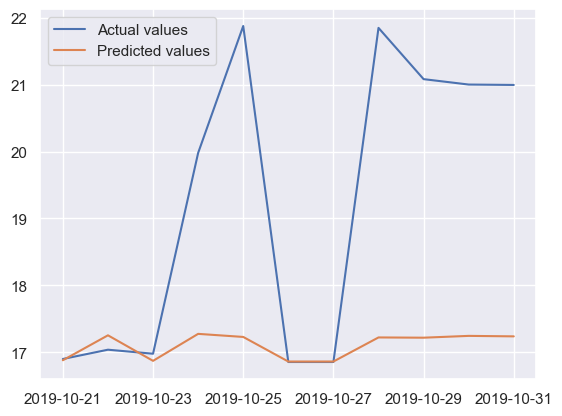

In [293]:
plt.plot(tesla_pred['Date'].tail(11), y_test, label = "Actual values")
plt.plot(tesla_pred['Date'].tail(11), predict, label = "Predicted values")
plt.legend()
plt.show()

Making a 2D array that will store the Negative and Positive sentiment for Training and Testing dataset.